<a href="https://colab.research.google.com/github/takeshinishimura/Agricultural_Markets/blob/main/diffusion_of_microwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=f221f05616e4c7458fcb57acb7901bab52b83bed677221faee1f31397654f729
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


In [12]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import japanize_matplotlib

In [ ]:
!wget https://www.esri.cao.go.jp/jp/stat/shouhi/0403fukyuritsu.xls

--2023-03-21 05:13:25--  https://www.esri.cao.go.jp/jp/stat/shouhi/0403fukyuritsu.xls
Resolving www.esri.cao.go.jp (www.esri.cao.go.jp)... 210.148.118.43, 2001:240:1d4:1::43
Connecting to www.esri.cao.go.jp (www.esri.cao.go.jp)|210.148.118.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74240 (72K) [application/vnd.ms-excel]
Saving to: ‘0403fukyuritsu.xls’

0403fukyuritsu.xls  100%[===================>]  72.50K   197KB/s    in 0.4s    

2023-03-21 05:13:27 (197 KB/s) - ‘0403fukyuritsu.xls’ saved [74240/74240]



In [ ]:
df = pd.read_excel("0403fukyuritsu.xls", header=2, skipfooter=2)
df.head()

,Unnamed: 0,調査項目,じゅうたん,応接セット,ユニット家具,ベッド,温水洗浄便座,洗髪洗面化粧台,システムキッチン,温水器,...,携帯電話,乗用車,Unnamed: 46,Unnamed: 47,ｵｰﾄﾊﾞｲ･ｽｸｰﾀｰ,自転車,カメラ,ピアノ,電子鍵盤楽器,ゴルフセット
0,調査時期,NaN,,,,,,,,,...,NaN,,新車,中古車,,,,,,
1,昭和,32.9,,8.7,,,,,,,...,NaN,,,,,63.3,35.7,1.2,3.7,
2,NaN,33.2,,9.4,,,,,,,...,NaN,,,,,65.6,38.5,1.3,4.1,
3,NaN,34.2,,12.4,,,,,,,...,NaN,,,,8.4,68.7,43.4,1.6,5.1,
4,NaN,35.2,,15.5,,,,,,,...,NaN,,,,9.6,67.7,45.8,2,5.9,


In [ ]:
df = df.replace('\u3000\u3000', np.nan)
df = df.drop(0)

In [ ]:
nen = []
for i in df["調査項目"]:
    if i > 30:
        nen.append(math.floor(i) + 1925)
    else:
        nen.append(math.floor(i) + 1988)
df["年"] = nen

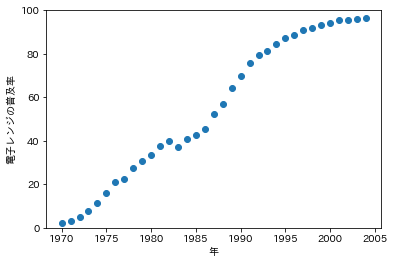

In [13]:
plt.scatter(df["年"], df["電子レンジ"])
plt.ylim(0, 100)
plt.xlabel("年")
plt.ylabel("電子レンジの普及率")
plt.savefig("microwave.pdf", format="pdf", dpi=300)

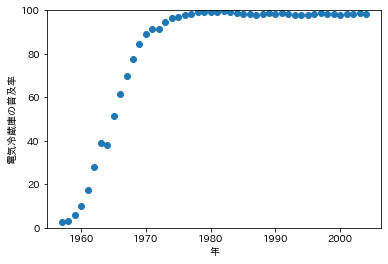

In [14]:
plt.scatter(df["年"], df["電気冷蔵庫"])
plt.ylim(0, 100)
plt.xlabel("年")
plt.ylabel("電気冷蔵庫の普及率")
plt.savefig("refrigerator.pdf", format="pdf", dpi=300)